<a href="https://colab.research.google.com/github/BHARATJHAWAR52/Hamoye_Spring-2024/blob/main/Hamoye'24_StageE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
input_file_path = '/content/drive/MyDrive/Dataset/household_power_consumption.txt'
output_csv_path = 'household_power_consumption.csv'

# the file is semicolon-separated (if it's a different delimiter, adjust the sep parameter)
df = pd.read_csv(input_file_path, sep=';')

# Save DataFrame as CSV
df.to_csv(output_csv_path, index=False)

<ipython-input-3-5e1249325e3c>:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path, sep=';')


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [8]:
df_copy=df.copy()
df_copy_ffill = df_copy.fillna(method='ffill')
df=df_copy_ffill
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [10]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

In [11]:
df.set_index('datetime', inplace=True)

In [12]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [13]:
hourly_data = df['Global_active_power'].resample('H').sum()

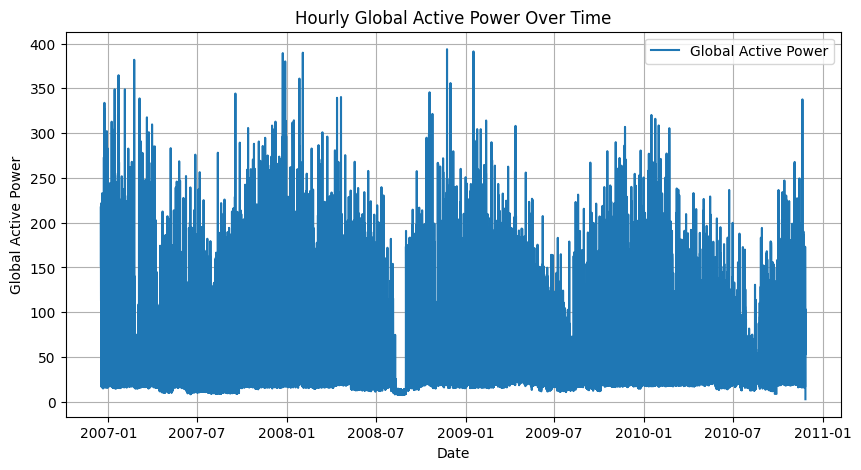

In [14]:
import matplotlib.pyplot as plt
# Plot the resampled data
plt.figure(figsize=(10, 5))
plt.plot(hourly_data.index, hourly_data, label='Global Active Power')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Hourly Global Active Power Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
correlation1 = df['Global_active_power'].corr(df['Voltage'])
print(f"Pearson correlation coefficient: {correlation1:.3f}")

Pearson correlation coefficient: -0.396


In [16]:
correlation2 = df['Voltage'].corr(df['Global_intensity'])
print(f"Pearson correlation coefficient: {correlation2:.2f}")

Pearson correlation coefficient: -0.41


In [17]:
!pip install prophet
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
daily_data = df['Global_active_power'].resample('D').sum().reset_index()

daily_data.columns = ['ds', 'y']

train_data = daily_data.iloc[:-300]
test_data = daily_data.iloc[-300:]

model = Prophet()
model.fit(train_data)

future = model.make_future_dataframe(periods=300)
forecast = model.predict(future)
forecast_test = forecast[['ds', 'yhat']].tail(300)

test_data = test_data.set_index('ds')
forecast_test = forecast_test.set_index('ds')
results = test_data.merge(forecast_test, left_index=True, right_index=True)

mape = mean_absolute_percentage_error(results['y'], results['yhat']) * 100
print(f"MAPE: {mape:.2f}%")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxun9s1o8/9pum6c2d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxun9s1o8/9ro90n3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94701', 'data', 'file=/tmp/tmpxun9s1o8/9pum6c2d.json', 'init=/tmp/tmpxun9s1o8/9ro90n3v.json', 'output', 'file=/tmp/tmpxun9s1o8/prophet_modelwrcii4m6/prophet_model-20240618132650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:26:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:26:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE: 27.20%


In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
print(f"RMSE: {rmse:.2f}")

RMSE: 401.61


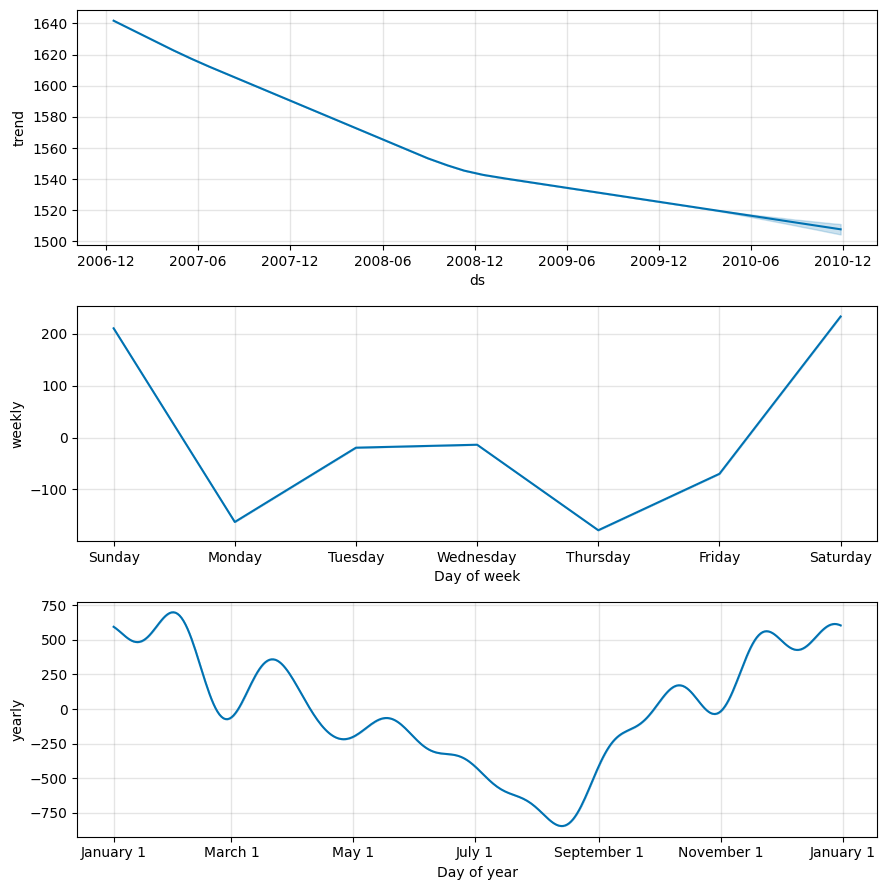

In [20]:
fig = model.plot_components(forecast)
plt.show()

In [21]:
daily_data1 = df.resample('D').sum().reset_index()

# Prepare the data for Prophet
daily_data1.rename(columns={
    'datetime': 'ds',
    'Global_active_power': 'y',
    'Global_reactive_power': 'add1',
    'Voltage': 'add2',
    'Global_intensity': 'add3',
    'Sub_metering_1': 'add4',
    'Sub_metering_2': 'add5',
    'Sub_metering_3': 'add6'
}, inplace=True)


In [25]:
train_data1 = daily_data1.iloc[:-300]
test_data1 = daily_data1.iloc[-300:]

model1 = Prophet()

# Add the additional regressors
model1.add_regressor('add1')
model1.add_regressor('add2')
model1.add_regressor('add3')
model1.add_regressor('add4')
model1.add_regressor('add5')
model1.add_regressor('add6')

model1.fit(train_data1)

future1 = model1.make_future_dataframe(periods=300)

# Include the regressors in the future DataFrame
future1['add1'] = daily_data1['add1']
future1['add2'] = daily_data1['add2']
future1['add3'] = daily_data1['add3']
future1['add4'] = daily_data1['add4']
future1['add5'] = daily_data1['add5']
future1['add6'] = daily_data1['add6']

# Predict the future
forecast1 = model1.predict(future1)

# Extract the forecasted values for the test set period
forecast_test1 = forecast1[['ds', 'yhat']].tail(300)

# Merge the forecast with the actual values
test_data1 = test_data1.set_index('ds')
forecast_test1 = forecast_test1.set_index('ds')
results1 = test_data1[['y']].merge(forecast_test1, left_index=True, right_index=True)

# Calculate the Mean Absolute Percentage Error (MAPE)
mape1 = mean_absolute_percentage_error(results1['y'], results1['yhat']) * 100

# Print the MAPE
print(f"MAPE: {mape1:.2f}%")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxun9s1o8/oo7abtby.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxun9s1o8/1gce6l3o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80106', 'data', 'file=/tmp/tmpxun9s1o8/oo7abtby.json', 'init=/tmp/tmpxun9s1o8/1gce6l3o.json', 'output', 'file=/tmp/tmpxun9s1o8/prophet_modelnjo2rcxk/prophet_model-20240618133429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAPE: 2.49%


In [26]:
rmse1 = np.sqrt(mean_squared_error(results1['y'], results1['yhat']))
print(f"RMSE: {rmse1:.2f}")

RMSE: 33.83


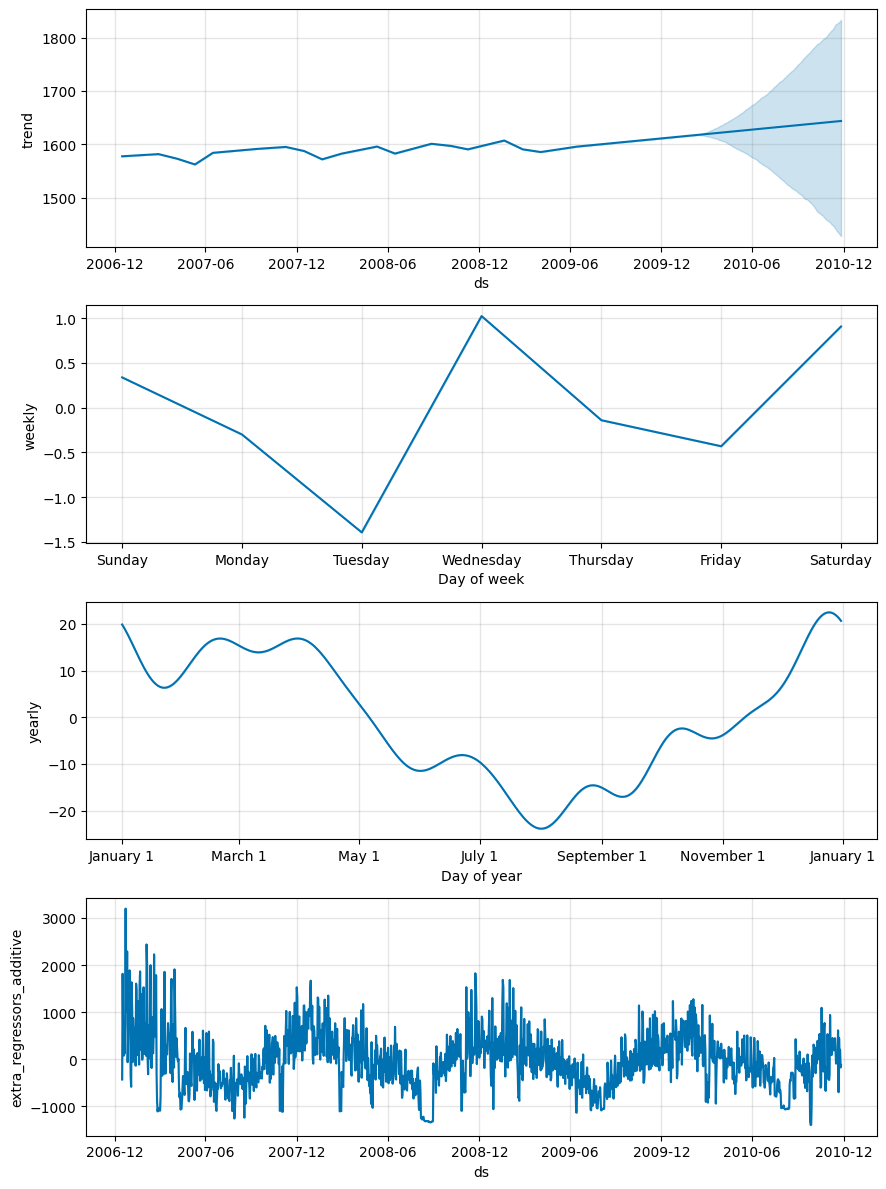

In [27]:
fig1 = model1.plot_components(forecast1)
plt.show()